In [1]:
import json
import os
import sys
import pandas as pd
import numpy as np

# Process the train set

In [2]:
train_content = open('fgvc4_iMat.train.data.json','rb')
train_content = json.load(train_content)
train_anno = pd.DataFrame(train_content.get('annotations'))
train_anno

,labelId,imageId,taskId
0,6,1,5
1,7,2,6
2,8,3,7
3,10,4,9
4,14,5,12
...,...,...,...
62083,352,42027,21
62084,297,42028,11
62085,339,42029,14
62086,380,42029,5


In [9]:
label = json.load(open('fgvc4_iMat.filter.label_map','rb'))
label = pd.DataFrame(label.get('labelInfo'))
label

,labelName,labelId
0,men,1
1,adult,2
2,black,3
3,women,4
4,flat,5
...,...,...
376,hole,377
377,chunky heels,378
378,ankle length,379
379,hollow out,380


In [6]:
task = json.load(open('fgvc4_iMat.filter.task_map','rb'))
task = pd.DataFrame(task.get('taskInfo'))
task

,taskName,taskId
0,shoe:gender,1
1,shoe:age,2
2,shoe:color,3
3,shoe:up height,4
4,dress:decoration,5
5,dress:color,6
6,dress:material,7
7,dress:silhouette,8
8,shoe:type,9
9,shoe:closure type,10


In [11]:
train = pd.merge(train_anno,label,how='left')
train = pd.merge(train,task,how='left')
train

,labelId,imageId,taskId,labelName,taskName
0,6,1,5,printed,dress:decoration
1,7,2,6,purple,dress:color
2,8,3,7,velvet,dress:material
3,10,4,9,sneaker,shoe:type
4,14,5,12,midi,dress:length
...,...,...,...,...,...
62083,352,42027,21,synthetic leather,outerwear:material
62084,297,42028,11,wine,pants:color
62085,339,42029,14,night club,dress:occasion
62086,380,42029,5,hollow out,dress:decoration


In [12]:
train['tasknum'] = train['taskName'].apply(lambda x: len(x.split(':')))
train['tasknum'].describe()
# All the images have two tasks splitted by :

count    62088.0
mean         2.0
std          0.0
min          2.0
25%          2.0
50%          2.0
75%          2.0
max          2.0
Name: tasknum, dtype: float64

In [13]:
train['task1'] = train['taskName'].apply(lambda x: x.split(':')[0])
train['task2'] = train['taskName'].apply(lambda x: x.split(':')[1])
train

,labelId,imageId,taskId,labelName,taskName,tasknum,task1,task2
0,6,1,5,printed,dress:decoration,2,dress,decoration
1,7,2,6,purple,dress:color,2,dress,color
2,8,3,7,velvet,dress:material,2,dress,material
3,10,4,9,sneaker,shoe:type,2,shoe,type
4,14,5,12,midi,dress:length,2,dress,length
...,...,...,...,...,...,...,...,...
62083,352,42027,21,synthetic leather,outerwear:material,2,outerwear,material
62084,297,42028,11,wine,pants:color,2,pants,color
62085,339,42029,14,night club,dress:occasion,2,dress,occasion
62086,380,42029,5,hollow out,dress:decoration,2,dress,decoration


In [16]:
# Find the valid images
from PIL import Image
files = os.listdir('./train_images/')
valid_imageid = []
for file in files:
    try:
        fp = open('./train_images/'+file,'rb')
        Image.open(fp)
        fp.close()
        valid_imageid.append(file[:-4])
    except:
        continue
print(len(valid_imageid))
# Have 24644 valid images in total

24644


In [19]:
# Select the information of valid images
train = train[train['imageId'].isin(set(valid_imageid))]

In [20]:
train

,labelId,imageId,taskId,labelName,taskName,tasknum,task1,task2
0,6,1,5,printed,dress:decoration,2,dress,decoration
1,7,2,6,purple,dress:color,2,dress,color
2,8,3,7,velvet,dress:material,2,dress,material
3,10,4,9,sneaker,shoe:type,2,shoe,type
7,23,7,6,red,dress:color,2,dress,color
...,...,...,...,...,...,...,...,...
62077,20,42023,11,blue,pants:color,2,pants,color
62078,289,42024,26,goretex,pants:material,2,pants,material
62085,339,42029,14,night club,dress:occasion,2,dress,occasion
62086,380,42029,5,hollow out,dress:decoration,2,dress,decoration


In [21]:
train4base = train[['imageId','task1']].drop_duplicates()
train4base
# This has 24557 rows > 24644 which means some of the images have more than one classes

,imageId,task1
0,1,dress
1,2,dress
2,3,dress
3,4,shoe
7,7,dress
...,...,...
62072,42020,outerwear
62073,42021,outerwear
62075,42023,pants
62078,42024,pants


In [28]:
classnum = train4base.groupby('imageId').count().sort_values('task1',ascending=False).reset_index().rename({'task1':'classnum'},axis=1)
train4base = pd.merge(train4base,classnum,how='left')
train4base[train4base['classnum']>=2]

,imageId,task1,classnum
175,292,dress,2
176,292,shoe,2
1166,2097,outerwear,2
1167,2097,pants,2
2267,4090,outerwear,2
2268,4090,shoe,2
2694,4884,outerwear,2
2695,4884,pants,2
3232,5822,outerwear,2
3233,5822,pants,2


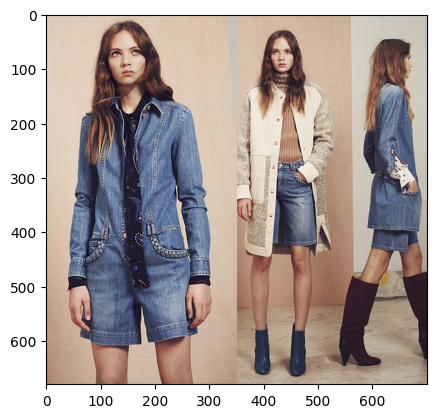

In [32]:
import matplotlib.pyplot as plt
i292 = open('./train_images/292.jpg','rb')
i292 = Image.open(i292)
fig = plt.figure()
plt.imshow(i292)
# In image 292, there are indeed both dress and shoes

In [33]:
train4base.groupby('task1').count() 
# Dress and outerwear are more than pants and shoe but the discrepancy is acceptable

,imageId,classnum
task1,,
dress,7555,7555
outerwear,7348,7348
pants,5393,5393
shoe,4371,4371


In [34]:
train4base.to_csv('train4base.csv')
train.to_csv('train.csv')

# Process the validation set

In [2]:
validation_content = open('fgvc4_iMat.validation.data','rb')
validation_content = json.load(validation_content)
validation_anno = pd.DataFrame(validation_content.get('annotations'))
validation_anno

,taskId,imageId,labelId
0,1,1,1
1,2,1,2
2,3,1,3
3,10,2,11
4,4,3,18
...,...,...,...
12401,1,8429,1
12402,26,8430,289
12403,2,8431,2
12404,1,8431,4


In [3]:
label = json.load(open('fgvc4_iMat.filter.label_map','rb'))
label = pd.DataFrame(label.get('labelInfo'))
task = json.load(open('fgvc4_iMat.filter.task_map','rb'))
task = pd.DataFrame(task.get('taskInfo'))

In [4]:
validation = pd.merge(validation_anno,label,how='left')
validation = pd.merge(validation,task,how='left')
validation['task1'] = validation['taskName'].apply(lambda x: x.split(':')[0])
validation['task2'] = validation['taskName'].apply(lambda x: x.split(':')[1])
validation

,taskId,imageId,labelId,labelName,taskName,task1,task2
0,1,1,1,men,shoe:gender,shoe,gender
1,2,1,2,adult,shoe:age,shoe,age
2,3,1,3,black,shoe:color,shoe,color
3,10,2,11,slipon,shoe:closure type,shoe,closure type
4,4,3,18,low,shoe:up height,shoe,up height
...,...,...,...,...,...,...,...
12401,1,8429,1,men,shoe:gender,shoe,gender
12402,26,8430,289,goretex,pants:material,pants,material
12403,2,8431,2,adult,shoe:age,shoe,age
12404,1,8431,4,women,shoe:gender,shoe,gender


In [5]:
# Find the valid images
from PIL import Image
files = os.listdir('/Users/ethancolt/Desktop/Deep Learning for Computer Vision/Final/validation_images/')
valid_imageid = []
for file in files:
    try:
        fp = open('/Users/ethancolt/Desktop/Deep Learning for Computer Vision/Final/validation_images/'+file,'rb')
        Image.open(fp)
        fp.close()
        valid_imageid.append(file[:-4])
    except:
        continue
print(len(valid_imageid))
# Have 4951 valid images in total

4951


In [6]:
validation = validation[validation['imageId'].isin(set(valid_imageid))]
validation

,taskId,imageId,labelId,labelName,taskName,task1,task2
0,1,1,1,men,shoe:gender,shoe,gender
1,2,1,2,adult,shoe:age,shoe,age
2,3,1,3,black,shoe:color,shoe,color
3,10,2,11,slipon,shoe:closure type,shoe,closure type
5,14,4,26,wedding,dress:occasion,dress,occasion
...,...,...,...,...,...,...,...
12399,21,8427,64,satin,outerwear:material,outerwear,material
12400,14,8428,26,wedding,dress:occasion,dress,occasion
12401,1,8429,1,men,shoe:gender,shoe,gender
12402,26,8430,289,goretex,pants:material,pants,material


In [7]:
validation4base = validation[['imageId','task1']].drop_duplicates()
validation4base
# Still, the validation set has some images with multiple classes

,imageId,task1
0,1,shoe
3,2,shoe
5,4,dress
6,5,dress
8,7,shoe
...,...,...
12398,8427,outerwear
12400,8428,dress
12401,8429,shoe
12402,8430,pants


In [8]:
classnum = validation4base.groupby('imageId').count().sort_values('task1',ascending=False).reset_index().rename({'task1':'classnum'},axis=1)
validation4base = pd.merge(validation4base,classnum,how='left')
validation4base[validation4base['classnum']>=2]

,imageId,task1,classnum
61,133,outerwear,2
62,133,pants,2
202,367,outerwear,2
203,367,pants,2
465,825,outerwear,2
466,825,shoe,2
1007,1743,pants,2
1008,1743,dress,2
1524,2653,dress,2
1525,2653,outerwear,2


In [9]:
validation4base.to_csv('validation4base.csv')
validation.to_csv('validation.csv')

**下面是垃圾**

In [10]:
content = open('val2017.json','rb')
content = json.load(content)
pd.DataFrame(content.get('annotations'))

,image_id,category_id,id
0,0,0,0
1,11,0,11
2,18,0,18
3,21,0,21
4,37,0,37
...,...,...,...
95981,675063,5086,675063
95982,675110,5086,675110
95983,675152,5087,675152
95984,675153,5087,675153


In [12]:
pd.DataFrame(content.get('images'))

,license,file_name,rights_holder,height,width,id
0,3,train_val_images/Mammalia/Marmota flaviventris...,zhil67,533,800,0
1,3,train_val_images/Mammalia/Marmota flaviventris...,Joe Miller,800,800,11
2,3,train_val_images/Mammalia/Marmota flaviventris...,salmonskyview,600,800,18
3,3,train_val_images/Mammalia/Marmota flaviventris...,psweet,800,735,21
4,3,train_val_images/Mammalia/Marmota flaviventris...,mikewitkowski,800,600,37
...,...,...,...,...,...,...
95981,3,train_val_images/Aves/Columba livia/78a62bdb5a...,diegou10,800,600,675063
95982,3,train_val_images/Aves/Columba livia/e37f20f553...,rosemarie,800,600,675110
95983,3,train_val_images/Insecta/Notarctia proxima/8ea...,Juan Cruzado Cortés,474,800,675152
95984,3,train_val_images/Insecta/Notarctia proxima/add...,Liam O'Brien,694,800,675153


In [13]:
pd.DataFrame(content.get('categories'))

,supercategory,id,name
0,Insecta,1916,Nicrophorus tomentosus
1,Insecta,3808,Halyomorpha halys
2,Plantae,3516,Betula lenta
3,Fungi,2533,Hericium erinaceus
4,Animalia,4854,Harpaphe haydeniana
...,...,...,...
5084,Plantae,3297,Cynoglossum grande
5085,Plantae,798,Malva moschata
5086,Insecta,4643,Phanaeus vindex
5087,Insecta,2901,Agraulis vanillae


In [2]:
import json
import pandas as pd

In [3]:
content = open('fgvc4_iMat.train.data.json','rb')
content = json.load(content)
pd.DataFrame(content.get('annotations'))

,labelId,imageId,taskId
0,6,1,5
1,7,2,6
2,8,3,7
3,10,4,9
4,14,5,12
...,...,...,...
62083,352,42027,21
62084,297,42028,11
62085,339,42029,14
62086,380,42029,5


In [5]:
pd.DataFrame(content.get('images'))

,url,imageId
0,[http://im28.gulfup.com/2012-04-14/13344248029...,1
1,[http://dtpmhvbsmffsz.cloudfront.net/posts/201...,2
2,[http://ep.yimg.com/ay/yhst-2003691491864/new-...,3
3,[http://sneakerlover.de/wp-content/uploads/201...,4
4,[http://allplussizedresses.com/wp-content/uplo...,5
...,...,...
42024,[http://i01.i.aliimg.com/wsphoto/v0/556409753/...,42025
42025,[http://img.alibaba.com/wsphoto/v0/514341333/H...,42026
42026,[http://bingua.com/images/cotizacion_images/20...,42027
42027,[http://nattstadcdn.com/6/1000000/970000/96149...,42028


In [4]:
import sys
import requests
data = pd.DataFrame(content.get('images')).iloc[40000:,:]
def download_image(urls,imageid):
    while len(urls)>0:
        try:
            with open('./train/'+imageid+'.jpg','wb') as f:
                img = requests.get(urls[0],timeout=1).content
                f.write(img)
                f.close
            urls = []
        except:
            urls = urls[1:]           
    return
error = []
for imageid,url in zip(data['imageId'],data['url']):
    try:
        download_image(url,imageid)
    except:
        error.append(imageid)
    sys.stdout.write('\rn°: {}'.format(imageid))
        

n°: 42029

In [5]:
content = open('fgvc4_iMat.validation.data','rb')
content = json.load(content)
pd.DataFrame(content.get('images'))

,url,imageId
0,[https://s-media-cache-ak0.pinimg.com/original...,1
1,[https://s-media-cache-ak0.pinimg.com/736x/bd/...,2
2,[http://cdn.iofferphoto.com/img3/item/612/976/...,3
3,[http://static.wixstatic.com/media/435eb4_c5a9...,4
4,[http://couturedressesuk.com/image/cache/data/...,5
...,...,...
8427,[http://picvpic.com/fashion101/wp-content/uplo...,8428
8428,[http://163.musicway.cn/order/itingsid-null/sd...,8429
8429,[http://i.stpost.com/product~p~152JM_01~1500.1...,8430
8430,[http://www.atopshoe.com/wp-content/uploads/20...,8431


In [6]:
import sys
import requests
data = pd.DataFrame(content.get('images')).iloc[2000:,:]
def download_image(urls,imageid):
    while len(urls)>0:
        try:
            with open('./validation/'+imageid+'.jpg','wb') as f:
                img = requests.get(urls[0],timeout=1).content
                f.write(img)
                f.close
            urls = []
        except:
            urls = urls[1:]           
    return
error = []
for imageid,url in zip(data['imageId'],data['url']):
    try:
        download_image(url,imageid)
    except:
        error.append(imageid)
    sys.stdout.write('\rn°: {}'.format(imageid))

n°: 2000

In [8]:
f = open('./train/40.jpg','rb')
print(f)

<_io.BufferedReader name='./train/40.jpg'>


In [12]:
from PIL import Image
import os
files = os.listdir('./train/')
error = []
for file in files:
    try:
        fp = open('./train/'+file,'rb')
        Image.open(fp)
        fp.close()
    except:
        error.append(file)
print(error)

['40270.jpg', '12250.jpg', '6372.jpg', '18741.jpg', '26877.jpg', '13614.jpg', '24906.jpg', '8377.jpg', '15271.jpg', '26888.jpg', '30754.jpg', '24735.jpg', '27200.jpg', '88.jpg', '23700.jpg', '10123.jpg', '4015.jpg', '26485.jpg', '30581.jpg', '5479.jpg', '13358.jpg', '4997.jpg', '8607.jpg', '8161.jpg', '30556.jpg', '17857.jpg', '30230.jpg', '27980.jpg', '23270.jpg', '10862.jpg', '29985.jpg', '412.jpg', '374.jpg', '40660.jpg', '11349.jpg', '16354.jpg', '18351.jpg', '10719.jpg', '11407.jpg', '20143.jpg', '9492.jpg', '3829.jpg', '25013.jpg', '28523.jpg', '9647.jpg', '9121.jpg', '40310.jpg', '13990.jpg', '5733.jpg', '8571.jpg', '18812.jpg', '11188.jpg', '9848.jpg', '28735.jpg', '25577.jpg', '24669.jpg', '764.jpg', '28720.jpg', '4389.jpg', '21062.jpg', '20368.jpg', '21076.jpg', '13952.jpg', '24654.jpg', '1232.jpg', '28091.jpg', '14740.jpg', '956.jpg', '21937.jpg', '4835.jpg', '2288.jpg', '3828.jpg', '12696.jpg', '10081.jpg', '4809.jpg', '26241.jpg', '10095.jpg', '12682.jpg', '7441.jpg', '184

In [13]:
len(error)

1998

In [14]:
error = error+os.listdir('./fail_train/')
error

['40270.jpg',
 '12250.jpg',
 '6372.jpg',
 '18741.jpg',
 '26877.jpg',
 '13614.jpg',
 '24906.jpg',
 '8377.jpg',
 '15271.jpg',
 '26888.jpg',
 '30754.jpg',
 '24735.jpg',
 '27200.jpg',
 '88.jpg',
 '23700.jpg',
 '10123.jpg',
 '4015.jpg',
 '26485.jpg',
 '30581.jpg',
 '5479.jpg',
 '13358.jpg',
 '4997.jpg',
 '8607.jpg',
 '8161.jpg',
 '30556.jpg',
 '17857.jpg',
 '30230.jpg',
 '27980.jpg',
 '23270.jpg',
 '10862.jpg',
 '29985.jpg',
 '412.jpg',
 '374.jpg',
 '40660.jpg',
 '11349.jpg',
 '16354.jpg',
 '18351.jpg',
 '10719.jpg',
 '11407.jpg',
 '20143.jpg',
 '9492.jpg',
 '3829.jpg',
 '25013.jpg',
 '28523.jpg',
 '9647.jpg',
 '9121.jpg',
 '40310.jpg',
 '13990.jpg',
 '5733.jpg',
 '8571.jpg',
 '18812.jpg',
 '11188.jpg',
 '9848.jpg',
 '28735.jpg',
 '25577.jpg',
 '24669.jpg',
 '764.jpg',
 '28720.jpg',
 '4389.jpg',
 '21062.jpg',
 '20368.jpg',
 '21076.jpg',
 '13952.jpg',
 '24654.jpg',
 '1232.jpg',
 '28091.jpg',
 '14740.jpg',
 '956.jpg',
 '21937.jpg',
 '4835.jpg',
 '2288.jpg',
 '3828.jpg',
 '12696.jpg',
 '10081.

In [15]:
len(error)

14793

In [16]:
fp = open('train_failist.txt','w')
for e in error:
    fp.write(e+'\n')
fp.close

<function TextIOWrapper.close()>

In [17]:
fp = open('train_failist1.txt')
a = [f[:-1] for f in fp.readlines()]
a

['34297.jpg',
 '35189.jpg',
 '36480.jpg',
 '35837.jpg',
 '34283.jpg',
 '38491.jpg',
 '32802.jpg',
 '30967.jpg',
 '30032.jpg',
 '36443.jpg',
 '39770.jpg',
 '32625.jpg',
 '34254.jpg',
 '38308.jpg',
 '30754.jpg',
 '30998.jpg',
 '34526.jpg',
 '34240.jpg',
 '37749.jpg',
 '39764.jpg',
 '31338.jpg',
 '32619.jpg',
 '33507.jpg',
 '39994.jpg',
 '31310.jpg',
 '37007.jpg',
 '33261.jpg',
 '33275.jpg',
 '35604.jpg',
 '38320.jpg',
 '37013.jpg',
 '39980.jpg',
 '37775.jpg',
 '35162.jpg',
 '36682.jpg',
 '33922.jpg',
 '33936.jpg',
 '38863.jpg',
 '30581.jpg',
 '31847.jpg',
 '34917.jpg',
 '38693.jpg',
 '38687.jpg',
 '39599.jpg',
 '30556.jpg',
 '37239.jpg',
 '31648.jpg',
 '34730.jpg',
 '39572.jpg',
 '30230.jpg',
 '36899.jpg',
 '39566.jpg',
 '30224.jpg',
 '34042.jpg',
 '36133.jpg',
 '33063.jpg',
 '38136.jpg',
 '39228.jpg',
 '31674.jpg',
 '31112.jpg',
 '37563.jpg',
 '35374.jpg',
 '33711.jpg',
 '31106.jpg',
 '37577.jpg',
 '30218.jpg',
 '35406.jpg',
 '31099.jpg',
 '33842.jpg',
 '38917.jpg',
 '38081.jpg',
 '3809

In [18]:
len(a)

4100

In [19]:
fp = open('train_failist.txt','a')
for e in a:
    fp.write(e+'\n')
fp.close

<function TextIOWrapper.close()>

In [20]:
fp = open('train_failist.txt')
a = [f[:-1] for f in fp.readlines()]
len(a)

18503

In [24]:
import os
for file in a:
    try:
        os.remove('./train/'+file)
    except:
        continue

In [26]:
a[0][:-4]

'40270.'